In [5]:
import os
print(os.environ['PATH'])

C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\ProgramData\Anaconda3\bin;C:\ProgramData\Anaconda3\condabin;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\System32;C:\Windows;C:\Windows\System32\wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\Java\jdk-12.0.2\bin;C:\Program Files\Java\JavaFX\javafx-sdk-13.0.1\lib;C:\Program Files\Java\JavaFX\javafx-sdk-13.0.1\bin;C:\Program Files\Git LFS;C:\Program Files\Git\cmd;C:\PROGRA~1\Java\JDK18~1.0_2;C:\spark\spark-2.4.5-bin-hadoop2.7\bin;C:\PROGRA~2\sbt\bin;C:\Program Files\Pandoc;C:\Program Files (x86)\Microsoft SQL Server\150\DTS\Binn;C:\Program Files\Azure Data Studio\bin;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\170\Tools\Binn;C:\Program Files (x86)\Microsoft SQL Server\150\Tools\Binn;C:\Program Files\Microsoft SQL Server\150\Too

In [6]:
!pip install latex

In [4]:
import sys
if "c:\programdata\anaconda3\lib\site-packages\latex" not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("c:\programdata\anaconda3\lib\site-packages\latex")

In [1]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [27]:

#Python Imports
import re
import string
from collections import Counter


#Pandas
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',120)

#Numpy
import numpy as np


#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as px 


In [13]:
df = pd.read_csv("/content/drive/My Drive/DS/ABTest/cookie_cats.csv",low_memory=False)
                 

In [14]:
df.shape

(90189, 5)

In [15]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [16]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

# The data is from **90,189** players that installed the game while the AB-test was running. <br>
The variables are:

* **userid** - a unique number that identifies each player.
* **version** - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
* **sum_gamerounds** - the number of game rounds played by the player during the * first week after installation
* **retention_1** - did the player come back and play 1 day after installing?
* **retention_7** - did the player come back and play 7 days after installing?
When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

Count distribution across Both groups

In [17]:
df['version'].value_counts(normalize=True)

gate_40    0.504374
gate_30    0.495626
Name: version, dtype: float64

We see, the proportion of Control group and Test group is almost same

How many players of Gate_40 are retained for 1 day

In [26]:
count_by_gamerounds = df[['userid','sum_gamerounds']].groupby(by='sum_gamerounds').count()
count_by_gamerounds.columns = ['Number_of_Players']
count_by_gamerounds.head()

,Number_of_Players
sum_gamerounds,
0,3994
1,5538
2,4606
3,3958
4,3629


Text(0, 0.5, 'number of users')

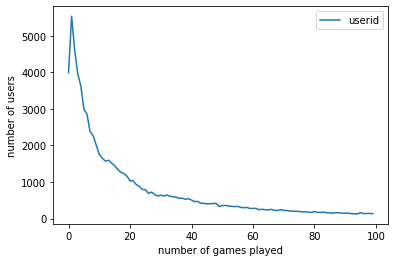

In [ ]:
ax = count_by_gamerounds.head(100).plot()
ax.set_xlabel("number of games played")
ax.set_ylabel("number of users")

The distribution is highly skewed, with a long tail on the right. A huge number of players played fewer than 20 rounds and left the game. For rounds greater than 60, the number of players stayed steady at about 300.


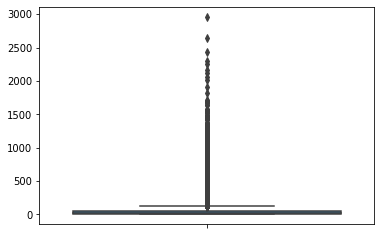

In [36]:
# df['sum_gamerounds'].plot.box(figsize=(5,10))
sns.boxplot(y=df['sum_gamerounds'].values)

Removing outlier row where sum_gamerounds is around 50000

In [30]:
df.drop(df[df['sum_gamerounds']>=40000].index, inplace = True)

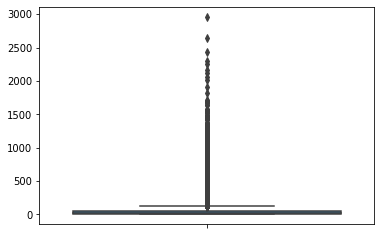

In [38]:
# df['sum_gamerounds'].plot.box(figsize=(5,10))
sns.boxplot(y=df['sum_gamerounds'].values)

In [ ]:
df['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

As we can see, 50% of players played fewer than 16 game rounds during the first week after installation, and 75% of players played fewer than 51 rounds.

Nearly 4000 players did not even play a single round after installation. Possible reasons may include:

They downloaded a number of new games at the same time and were attracted by other games.
They opened the app but did not like the design/interface/music, so they quit even before playing the game.
They have not started playing the game yet.
<br> 
<br>

Another number worth attention is that more than 14,000 players played fewer than three rounds. For these players, the reasons for leaving may include:

They did not enjoy the game. (This is probably the most common reason).
The game turned out to be different from what they expected.
The game was too easy and they got bored of it.
<br>
<br>

It is important to understand why a large number of players quit the game at an early stage. Tactile Entertainment can try to collect player feedback, for example, through an in-app survey.

In [ ]:
df[df['retention_1']==True].count()*100/df['retention_1'].count()

userid            44.521444
version           44.521444
sum_gamerounds    44.521444
retention_1       44.521444
retention_7       44.521444
dtype: float64

In [ ]:
df[df['retention_7']==True].count()*100/df['retention_7'].count()

userid            18.605579
version           18.605579
sum_gamerounds    18.605579
retention_1       18.605579
retention_7       18.605579
dtype: float64

## Comparing 1- Day Retention for each A-B group

In [ ]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

## Comparing 7 Day Retention for each A-B group

In [ ]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64



It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.


Bootstrapping: Should we be confident in the difference?

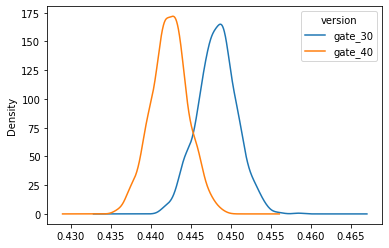

In [ ]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')



These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. There seems to be some evidence of a difference, albeit small. Let's plot the % difference to have a closer look.


In [ ]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.449741,0.437246
retention_1,0.451816,0.441358
retention_1,0.448291,0.444074
retention_1,0.450427,0.441869
retention_1,0.448662,0.442401


Probability that 1-day retention is greater when the gate is at level 30: 0.96


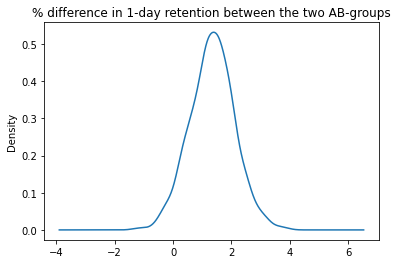

In [ ]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

From this chart, we can see that the most likely % difference is around 1% - 2%, and that 96% of the distribution is above 0%, in favor of a gate at level 30. 

In [ ]:
boot_1d.head()

version,gate_30,gate_40,diff
retention_1,0.449741,0.437246,2.857707
retention_1,0.451816,0.441358,2.369461
retention_1,0.448291,0.444074,0.949586
retention_1,0.450427,0.441869,1.936873
retention_1,0.448662,0.442401,1.415214


## Comparing 7-day Retention

The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 30. However, since players have only been playing the game for one day, it is likely that most players haven't reached level 30 yet. That is, many players won't have been affected by the gate, even if it's as early as level 30.

But after having played for a week, more players should have reached level 40, and therefore it makes sense to also look at 7-day retention.

In [39]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64



**Insights:**

Like with 1-day retention, 7-day retention is slightly lower when the gate is at level 40 (18.2%) than when the gate is at level 30 (19.0%).
This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate.
The overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing. 

But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.


Probability that 7-day retention is greater when the gate is at level 30: 1.0


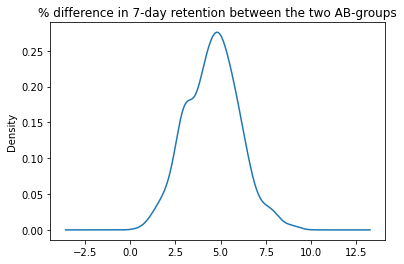

In [40]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 7-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

**Conclusion**
The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40.

There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.